In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%load_ext rpy2.ipython

In [3]:
df = pd.read_csv("../dane/przetworzone/sumy_laureaty.csv")

/usr/local/lib/python3.4/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (4,8,11,14,17,20,23,26,29,32) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [4]:
df.head()

,Unnamed: 0,id_szkoly,plec,rocznik,dysleksja,biologia_laureat,biologia_podstawowa,biologia_rozszerzona,chemia_laureat,chemia_podstawowa,...,j_angielski_rozszerzona,j_polski_laureat,j_polski_podstawowa,j_polski_rozszerzona,matematyka_laureat,matematyka_podstawowa,matematyka_rozszerzona,WOS_laureat,WOS_podstawowa,WOS_rozszerzona
0,2353129,24097,k,1995,False,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,25,NaN,NaN,4,NaN,NaN,NaN,NaN
1,17283699,72837,k,NaN,False,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,10,NaN,NaN,6,NaN,NaN,NaN,NaN
2,2347442,24111,k,1995,False,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,15,NaN,NaN,3,NaN,NaN,NaN,NaN
3,1939422,21795,k,1994,False,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6,NaN,NaN,4,NaN,NaN,NaN,NaN
4,2359723,25664,k,1995,False,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,39,NaN,NaN,13,NaN,NaN,NaN,NaN


In [5]:
print(len(df))
brakplci = df[pd.isnull(df.plec)]
print(len(brakplci))

304384
2648


In [6]:
brakplci.head()

,Unnamed: 0,id_szkoly,plec,rocznik,dysleksja,biologia_laureat,biologia_podstawowa,biologia_rozszerzona,chemia_laureat,chemia_podstawowa,...,j_angielski_rozszerzona,j_polski_laureat,j_polski_podstawowa,j_polski_rozszerzona,matematyka_laureat,matematyka_podstawowa,matematyka_rozszerzona,WOS_laureat,WOS_podstawowa,WOS_rozszerzona
1893,17268508,26142,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,42,NaN,NaN,23,NaN,NaN,NaN,NaN
35564,17284656,73364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,38,NaN,NaN,17,NaN,NaN,NaN,NaN
35669,17268012,27074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,43,NaN,NaN,28,8,NaN,NaN,NaN
35697,17268013,73412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7,NaN,NaN,8,NaN,NaN,NaN,NaN
36057,17268039,73318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,29,NaN,NaN,4,NaN,NaN,NaN,NaN


In [7]:
# cos nie tak z brakujacymi plcami
brakplci.count().iloc[:5]
# wydaje sie, ze tez brakuje innych metadanych, zatem pewnie nie piszacy z polskiego - right

Unnamed: 0    2648
id_szkoly       69
plec             0
rocznik          0
dysleksja        1
dtype: int64

In [8]:
df = df[pd.notnull(df.plec)]

In [9]:
for col in df.columns:
    if col.endswith("_laureat"):
        df[col] = df[col].fillna(False)

In [10]:
srednia = df.mean()

In [11]:
srednia

Unnamed: 0                 3154841.945436
id_szkoly                    26865.490114
rocznik                       1993.427887
biologia_laureat                 0.000278
biologia_podstawowa             17.497591
biologia_rozszerzona            32.067498
chemia_laureat                   0.000245
chemia_podstawowa               22.997605
chemia_rozszerzona              30.180401
fizyka_laureat                   0.000149
fizyka_podstawowa               18.169170
fizyka_rozszerzona              28.631630
geografia_laureat                0.000229
geografia_podstawowa            22.714166
geografia_rozszerzona           31.585120
historia_laureat                 0.000348
historia_podstawowa             46.967695
historia_rozszerzona            27.273173
informatyka_laureat              0.000202
informatyka_podstawowa          20.286339
informatyka_rozszerzona         26.087248
j_angielski_laureat              0.000123
j_angielski_podstawowa          34.548161
j_angielski_rozszerzona         32

In [12]:
maksima = df.max()

In [13]:
df[df.biologia_laureat==True].mean()

Unnamed: 0                 2528039.833333
id_szkoly                    23684.452381
rocznik                       1990.095238
biologia_laureat                 1.000000
biologia_podstawowa                   NaN
biologia_rozszerzona            60.000000
chemia_laureat                   0.035714
chemia_podstawowa                     NaN
chemia_rozszerzona              50.119048
fizyka_laureat                   0.011905
fizyka_podstawowa               41.500000
fizyka_rozszerzona              46.000000
geografia_laureat                0.011905
geografia_podstawowa                  NaN
geografia_rozszerzona           60.000000
historia_laureat                 0.000000
historia_podstawowa                   NaN
historia_rozszerzona                  NaN
informatyka_laureat              0.000000
informatyka_podstawowa                NaN
informatyka_rozszerzona               NaN
j_angielski_laureat              0.000000
j_angielski_podstawowa          48.618421
j_angielski_rozszerzona         44

In [14]:
df[df.biologia_laureat==True].count()

Unnamed: 0                 84
id_szkoly                  84
plec                       84
rocznik                    84
dysleksja                  84
biologia_laureat           84
biologia_podstawowa         0
biologia_rozszerzona       84
chemia_laureat             84
chemia_podstawowa           0
chemia_rozszerzona         84
fizyka_laureat             84
fizyka_podstawowa           2
fizyka_rozszerzona          7
geografia_laureat          84
geografia_podstawowa        0
geografia_rozszerzona       1
historia_laureat           84
historia_podstawowa         0
historia_rozszerzona        0
informatyka_laureat        84
informatyka_podstawowa      0
informatyka_rozszerzona     0
j_angielski_laureat        84
j_angielski_podstawowa     76
j_angielski_rozszerzona    48
j_polski_laureat           84
j_polski_podstawowa        84
j_polski_rozszerzona        2
matematyka_laureat         84
matematyka_podstawowa      84
matematyka_rozszerzona     14
WOS_laureat                84
WOS_podsta

In [15]:
kolumny_laureatow = [col for col in df.columns if col.endswith("_laureat")]
kolumny_przedmiotow = [col for col in df.columns if col.endswith("_podstawowa") or col.endswith("_rozszerzona")]

In [16]:
srednie_laureatow = pd.DataFrame([df[df[col]==True].mean() for col in kolumny_laureatow],
                                 index=kolumny_laureatow)

In [17]:
zlicenia_laureatow = pd.DataFrame([(df[df[col]==True] > 0).sum() for col in kolumny_laureatow],
                                 index=kolumny_laureatow)

In [18]:
srednie_laureatow.loc['srednia'] = srednia 

In [19]:
srednie_laureatow[kolumny_przedmiotow]

,biologia_podstawowa,biologia_rozszerzona,chemia_podstawowa,chemia_rozszerzona,fizyka_podstawowa,fizyka_rozszerzona,geografia_podstawowa,geografia_rozszerzona,historia_podstawowa,historia_rozszerzona,informatyka_podstawowa,informatyka_rozszerzona,j_angielski_podstawowa,j_angielski_rozszerzona,j_polski_podstawowa,j_polski_rozszerzona,matematyka_podstawowa,matematyka_rozszerzona,WOS_podstawowa,WOS_rozszerzona
biologia_laureat,NaN,60.000000,NaN,50.119048,41.50000,46.000000,NaN,60.000000,NaN,NaN,NaN,NaN,48.618421,44.572917,52.904762,34.500000,44.702381,30.571429,NaN,NaN
chemia_laureat,NaN,50.000000,NaN,60.000000,NaN,48.148148,NaN,NaN,80.000000,NaN,NaN,NaN,48.253425,42.141509,51.513514,23.000000,46.878378,38.444444,NaN,NaN
fizyka_laureat,NaN,54.500000,NaN,53.333333,NaN,60.000000,NaN,NaN,NaN,NaN,NaN,41.600000,47.875000,44.671875,46.800000,44.000000,48.644444,44.222222,NaN,NaN
geografia_laureat,29.000000,48.800000,30.000000,42.142857,25.50000,40.000000,NaN,60.000000,NaN,44.000000,NaN,NaN,48.358209,41.918367,52.753623,37.555556,44.217391,34.215686,NaN,38.500000
historia_laureat,NaN,47.000000,NaN,45.000000,12.00000,28.000000,42.000000,49.750000,NaN,50.000000,14.000000,NaN,47.209184,40.912162,55.676190,32.984615,37.190476,29.277778,NaN,37.819672
informatyka_laureat,NaN,NaN,NaN,NaN,NaN,45.357143,NaN,37.000000,NaN,NaN,NaN,50.000000,47.926230,43.444444,44.016393,32.000000,47.932203,42.200000,NaN,NaN
j_angielski_laureat,NaN,48.750000,NaN,51.222222,NaN,48.166667,NaN,52.000000,NaN,42.666667,NaN,29.500000,50.000000,49.515152,54.648649,33.812500,44.135135,40.050000,NaN,34.600000
j_polski_laureat,32.333333,45.071429,NaN,39.538462,36.00000,37.571429,NaN,46.277778,76.000000,38.357143,NaN,NaN,48.574534,41.857616,74.000000,44.000000,38.423077,29.269231,NaN,34.106061
matematyka_laureat,NaN,50.000000,NaN,50.666667,NaN,49.500000,NaN,46.000000,NaN,NaN,NaN,45.970588,48.808219,44.376923,48.459459,34.000000,50.000000,50.000000,NaN,37.000000
WOS_laureat,NaN,NaN,NaN,47.000000,NaN,44.666667,NaN,49.444444,87.000000,42.208333,NaN,NaN,46.975000,41.803030,53.675000,32.473684,40.375000,36.461538,NaN,50.000000


In [20]:
srednie_laureatow_proc = 100*srednie_laureatow[kolumny_przedmiotow]/maksima[kolumny_przedmiotow]

In [21]:
srednie_laureatow_proc['liczba'] = zlicenia_laureatow['id_szkoly']
srednie_laureatow_proc.loc['srednia', 'liczba'] = len(df)

In [22]:
# z dysleksja jest problem jako True, False i nan

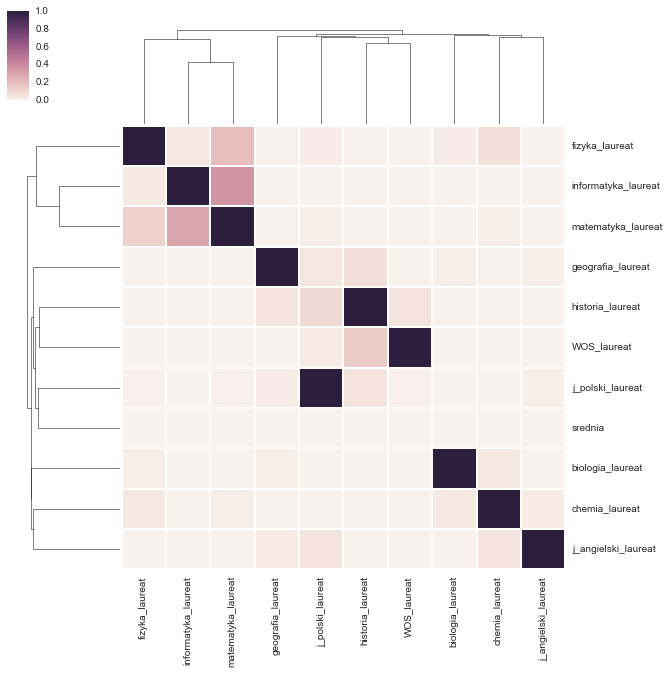

In [23]:
# heatmapy z warunkowych olimpiad
sns.clustermap(srednie_laureatow.loc[:, kolumny_laureatow]);

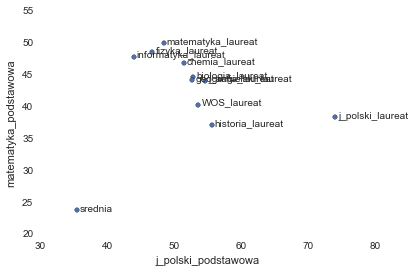

In [24]:
srednie_laureatow.plot(x='j_polski_podstawowa', y='matematyka_podstawowa', kind='scatter')
for k, v in srednie_laureatow.iterrows():
    plt.text(v['j_polski_podstawowa'] + 0.5, v['matematyka_podstawowa'] - 0.2, k)

In [25]:
# nie mam pojecia czemu sie zrobil syf z objekatami zamiast liczb
srednie_laureatow_proc = srednie_laureatow_proc.applymap(float)

In [26]:
srednie_laureatow_proc.index

Index(['biologia_laureat', 'chemia_laureat', 'fizyka_laureat',
       'geografia_laureat', 'historia_laureat', 'informatyka_laureat',
       'j_angielski_laureat', 'j_polski_laureat', 'matematyka_laureat',
       'WOS_laureat', 'srednia'],
      dtype='object')

In [27]:
srednie_laureatow_proc["olimpiada"] = ["biologiczna", "chemiczna", "fizyczna", "geograficzna", "historyczna",
                                      "informatyczna", "j. angielskiego", "j. polskiego", "matematyczna", "z WOSu",
                                      "(średni wynik ogółu)"]

In [28]:
srednie_laureatow_proc["olimpiada"]

biologia_laureat                biologiczna
chemia_laureat                    chemiczna
fizyka_laureat                     fizyczna
geografia_laureat              geograficzna
historia_laureat                historyczna
informatyka_laureat           informatyczna
j_angielski_laureat         j. angielskiego
j_polski_laureat               j. polskiego
matematyka_laureat             matematyczna
WOS_laureat                          z WOSu
srednia                (średni wynik ogółu)
Name: olimpiada, dtype: object

In [31]:
srednie_laureatow_proc

,biologia_podstawowa,biologia_rozszerzona,chemia_podstawowa,chemia_rozszerzona,fizyka_podstawowa,fizyka_rozszerzona,geografia_podstawowa,geografia_rozszerzona,historia_podstawowa,historia_rozszerzona,...,j_angielski_podstawowa,j_angielski_rozszerzona,j_polski_podstawowa,j_polski_rozszerzona,matematyka_podstawowa,matematyka_rozszerzona,WOS_podstawowa,WOS_rozszerzona,liczba,olimpiada
biologia_laureat,NaN,100.000000,NaN,83.531746,83.000000,76.666667,NaN,100.000000,NaN,NaN,...,97.236842,89.145833,71.492921,78.409091,89.404762,61.142857,NaN,NaN,84,biologiczna
chemia_laureat,NaN,83.333333,NaN,100.000000,NaN,80.246914,NaN,NaN,83.333333,NaN,...,96.506849,84.283019,69.612856,52.272727,93.756757,76.888889,NaN,NaN,74,chemiczna
fizyka_laureat,NaN,90.833333,NaN,88.888889,NaN,100.000000,NaN,NaN,NaN,NaN,...,95.750000,89.343750,63.243243,100.000000,97.288889,88.444444,NaN,NaN,45,fizyczna
geografia_laureat,63.043478,81.333333,60.000000,70.238095,51.000000,66.666667,NaN,100.000000,NaN,88.000000,...,96.716418,83.836735,71.288680,85.353535,88.434783,68.431373,NaN,77.000000,69,geograficzna
historia_laureat,NaN,78.333333,NaN,75.000000,24.000000,46.666667,85.714286,82.916667,NaN,100.000000,...,94.418367,81.824324,75.238095,74.965035,74.380952,58.555556,NaN,75.639344,105,historyczna
informatyka_laureat,NaN,NaN,NaN,NaN,NaN,75.595238,NaN,61.666667,NaN,NaN,...,95.852459,86.888889,59.481613,72.727273,95.864407,84.400000,NaN,NaN,61,informatyczna
j_angielski_laureat,NaN,81.250000,NaN,85.370370,NaN,80.277778,NaN,86.666667,NaN,85.333333,...,100.000000,99.030303,73.849525,76.846591,88.270270,80.100000,NaN,69.200000,37,j. angielskiego
j_polski_laureat,70.289855,75.119048,NaN,65.897436,72.000000,62.619048,NaN,77.129630,79.166667,76.714286,...,97.149068,83.715232,100.000000,100.000000,76.846154,58.538462,NaN,68.212121,183,j. polskiego
matematyka_laureat,NaN,83.333333,NaN,84.444444,NaN,82.500000,NaN,76.666667,NaN,NaN,...,97.616438,88.753846,65.485756,77.272727,100.000000,100.000000,NaN,74.000000,74,matematyczna
WOS_laureat,NaN,NaN,NaN,78.333333,NaN,74.444444,NaN,82.407407,90.625000,84.416667,...,93.950000,83.606061,72.533784,73.803828,80.750000,72.923077,NaN,100.000000,40,z WOSu


/usr/local/lib/python3.4/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘dplyr’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/usr/local/lib/python3.4/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following object is masked from ‘package:stats’:

    filter


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/usr/local/lib/python3.4/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  res = super(Function, self).__call__(*new_args, **new_kwargs)


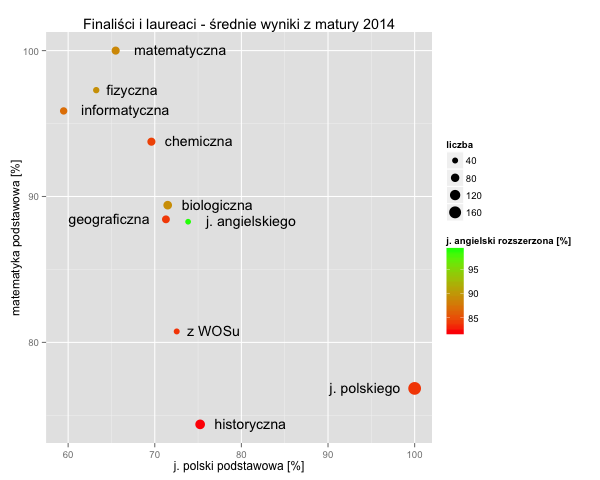

In [29]:
%%R -i srednie_laureatow_proc -w 600
library(dplyr)
library(ggplot2)

# hack, bo inaczej cos nie tak z konwersja
srednie_laureatow_proc[] <- lapply(srednie_laureatow_proc, function(x) {attr(x, 'dim') <- NULL; x})


#srednie_laureatow_proc$laureat <- rownames(srednie_laureatow_proc) %>% gsub("_laureat", "", .) %>% gsub("_", " ", .)

srednie_laureatow_proc <- filter(srednie_laureatow_proc, olimpiada != "(średni wynik ogółu)")

z <- c("geograficzna", "j. polskiego")

ggplot(srednie_laureatow_proc, aes(x=j_polski_podstawowa, y=matematyka_podstawowa,
                                   label=olimpiada)) +
  geom_point(aes(size=liczba, color=j_angielski_rozszerzona)) +  # j_angielski_podstawowa
  scale_size_area() +
  scale_colour_gradient("j. angielski rozszerzona [%]", low="red", high="green") + 
  geom_text(hjust=1.2, vjust=0.4, data=filter(srednie_laureatow_proc, olimpiada %in% z)) +
  geom_text(hjust=-0.2, vjust=0.4, data=filter(srednie_laureatow_proc, !(olimpiada %in% z))) +
 #  stat_smooth(method="lm", se=F, data=filter(srednie_laureatow_proc, !(olimpiada %in% c("matematyczna", "j. polskiego")))) +
  ggtitle("Finaliści i laureaci - średnie wyniki z matury 2014") +
  labs(x="j. polski podstawowa [%]", y="matematyka podstawowa [%]")

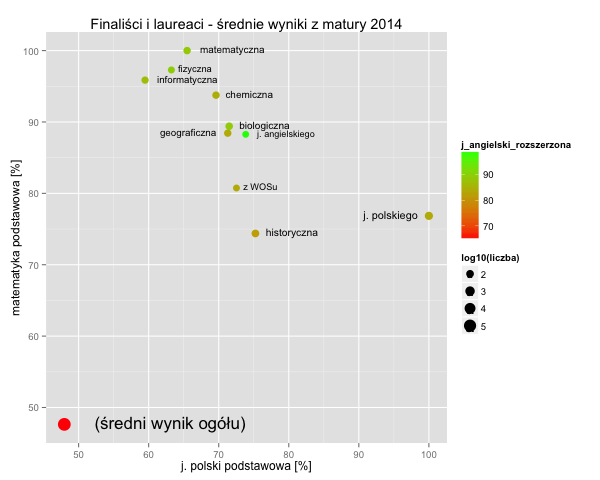

In [30]:
%%R -i srednie_laureatow_proc -w 600
library(dplyr)
library(ggplot2)

# hack, bo inaczej cos nie tak z konwersja
srednie_laureatow_proc[] <- lapply(srednie_laureatow_proc, function(x) {attr(x, 'dim') <- NULL; x})

ggplot(srednie_laureatow_proc, aes(x=j_polski_podstawowa, y=matematyka_podstawowa,
                                   label=olimpiada, size=log10(liczba))) +
  geom_point(aes(color=j_angielski_rozszerzona)) +  # j_angielski_podstawowa
  scale_size_area(max_size=6) +
  scale_colour_gradient(low="red", high="green") +
 # coord_cartesian("j. angielski rozszerzona [%]", xlim=c(-5, 105), ylim=c(-5, 105))
  geom_text(hjust=1.2, vjust=0.3, data=filter(srednie_laureatow_proc, olimpiada %in% z)) +
  geom_text(hjust=-0.2, vjust=0.3, data=filter(srednie_laureatow_proc, !(olimpiada %in% z))) +
  ggtitle("Finaliści i laureaci - średnie wyniki z matury 2014") +
  labs(x="j. polski podstawowa [%]", y="matematyka podstawowa [%]")